In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import sys

In [56]:
n = int(input())
x = []
y = []
for i in range(n):
    x_cur, y_cur = input().split()
    x.append(float(x_cur))
    y.append(float(y_cur))

4
2.5 4
6 5.6
4 5
9 5


In [68]:
d = {}
y = []
y_sum = 0
for _ in range(100):
    cur_x = 10 * random.random()
    cur_y = cur_x * 3 + random.normalvariate(0,1)
    d[cur_x] = cur_y

In [69]:
x, y = zip(*sorted([[keys, d[keys]] for keys in d.keys()], key = lambda x: x[0]))

In [57]:
s_left = 0
s_right = sum(y)
s2_left = 0
s2_right = sum(map(lambda x: x*2, y))
n = len(x)
best_a = y[0]
best_b = s_right / n
best_c = (x[0] + x[1]) / 2
best_coast = float('inf')

In [58]:
for i in range(n - 1):
    s_left += y[i]
    s_right -= y[i]
    s2_left += y[i] ** 2
    s2_right -= y[i] ** 2
    a = s_left / (i + 1)
    b = s_right / (n - i - 1)
    if x[i] != x[i+1]:
        left_coast = a * a * (i + 1) - 2 * a * s_left + s2_left
        right_coast = b * b * (n - i - 1)  - 2 * b * s_right + s2_right
        total_coast = left_coast + right_coast
        if total_coast < best_coast:
            best_a = a
            best_b = b
            best_c = (x[i] + x[i+1]) / 2
            best_coast = total_coast
        
    
    

In [59]:
best_a

7.410373224568067

In [60]:
best_b

22.5880911021549

In [61]:
tree_array = [tree(x[i], best_a, best_b, best_c) for i in range(len(x))]

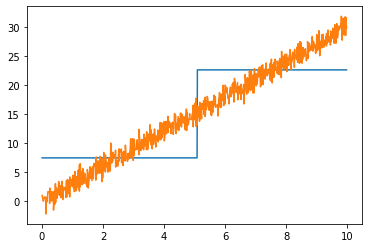

In [62]:
plt.plot(np.array(x), tree_array)
plt.plot(np.array(x), np.array(y))

In [42]:
def tree(x, a, b, c):
    return a if x < c else b

In [177]:
class MeanCalculation:
    def __init__(self):
        self.count = 0
        self.mean = 0
    
    def add(self, value, weight = 1):
        self.count += weight
        self.mean += weight * (value - self.mean) / self.count
    
    def remove(self, weight = 1):
        self.add(value, -weight)


In [178]:
class SumSquareError:
    def __init__(self):
        self.MeanCalculation = MeanCalculation()
        self.sse = 0
    
    def add(self, value, weight = 1):
        cur_dif = value - self.MeanCalculation.mean
        self.MeanCalculation.add(value, weight)
        self.sse += weight * cur_dif * (value - self.MeanCalculation.mean)
        
    def remove(self, value, weight = 1):
        self.add(value, -weight)

In [142]:
loss = []
items.sort()
min_loss = float('inf')
summarizer = Summarize(items,y_sum)
for i in range(1,len(items)):
#     a = np.mean(np.array(items)[:,1][:i])
#     b = np.mean(np.array(items)[:,1][i:])
    a, b = summarizer.step(i)
    c = (items[i][0] + items[i-1][0])/2 
    cur_loss = sum((items[j][1] -tree(items[j][0],a, b, c) ) ** 2 for j in range(len(items)))
    loss.append(cur_loss)
    if cur_loss < min_loss:
        min_loss = cur_loss
        best_a = a
        best_b = b
        best_c = c

In [185]:
best_a

6.089892110373388

In [146]:
best_a

5.935018915829673

In [147]:
best_b

21.28556986704623

In [148]:
best_c

4.722888636131463

In [144]:
tree_array = [tree(items[i][0], best_a, best_b, best_c) for i in range(len(items))]

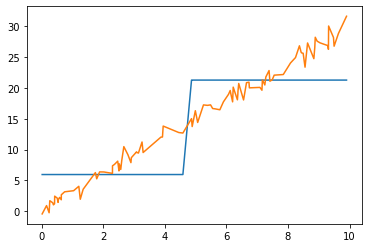

In [145]:
plt.plot(np.array(items)[:,0], tree_array)
plt.plot(np.array(items)[:,0], np.array(items)[:,1])

In [61]:
class Summarize:
    def __init__(self, items, y_sum):
        self.left_sum = 0
        self.right_sum = y_sum
        self.items = items
    def step(self, i):
        self.left_sum += items[i-1][1]
        self.right_sum -= items[i-1][1]
        return self.left_sum / i, self.right_sum / (len(items) - i)

In [284]:
df = pd.read_csv('data.csv', names = ['x', 'y'])

In [295]:
df['sin2x'] = df['x'].apply(lambda x: (np.sin(x))**2)
df['sinx*lnx'] = df['x'].apply(lambda x: np.sin(x) * np.log(x))
df['ln2x'] = df['x'].apply(lambda x: np.log(x)**2)
df['x**2'] = df['x'].apply(lambda x: x**2)

In [298]:
logit = LinearRegression()

In [303]:
logit.fit(df[df.columns.drop(['y', 'x'])], df['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [308]:
logit.predict(df.iloc[:3][df.columns.drop(['y', 'x'])])   

array([394.83548113, 238.31149524, 392.96994773])

In [316]:
w1, w2, w3, w4 = logit.coef_

In [315]:
df[df.columns.drop(['y', 'x'])]

,sin2x,sinx*lnx,ln2x,x**2
0,0.003218,-0.127604,5.059560,89.899560
1,0.314505,1.081466,3.718755,47.314402
2,0.000138,-0.026365,5.038174,89.047994
3,0.174616,-0.532084,1.621343,12.764139
4,0.777513,0.067532,0.005866,1.165527
...,...,...,...,...
995,0.425565,1.412306,4.686972,75.935416
996,0.358136,-0.796265,1.770383,14.312232
997,0.099081,0.695258,4.878690,82.893068
998,0.978644,0.535040,0.292514,2.949665


In [320]:
a = np.sqrt(w1)
b = np.sqrt(w3)
c = w4

In [321]:
a, b, c

(3.141728838215591, 2.7184288925288977, 3.999957864335596)

In [629]:
with open('restaurants_train.txt', 'r') as file:
    s = file.readline()

In [630]:
restarants = []
with open('restaurants_train.txt', 'r') as file:
    n = file.readline()
    for line in file:
        restarants.append(line.split())

In [631]:
restarants = pd.DataFrame(restarants, columns = ['y', 'r1', 'r2', 'd1', 'd2'])

In [665]:
def score (rd):
    r = float(rd[0])
    d = float(rd[1])
    if r > 0:
        return np.exp(r/2.9)/10 + (1/np.log(d*450 + 1.1))
    return  1 / (np.log(d*450 + 1.1))

In [666]:
restarants['score1'] = restarants[['r1', 'd1']].apply(score, axis = 1)
restarants['score2'] = restarants[['r2', 'd2']].apply(score, axis = 1)

In [667]:
max(restarants['score2'])

12.478819207859644

In [668]:
def m (df):
    negative1 = df[(df['y'] == str(1))]# & (df['score1'] > df['score2'])]
    negative2 = df[(df['y'] == str(0))]#& (df['score1'] < df['score2'])]
    s1 = sum(np.log(1 + np.exp(negative1['score1'] - negative1['score2'])))
    s2 = sum(np.log(1 + np.exp(negative2['score2'] - negative2['score1'])))
    return (s1 + s2) / (negative1.shape[0] + negative2.shape[0])

In [669]:
m(restarants)

0.5811958106452011

In [670]:
def optimization(df):
    def score (rd):
        r = float(rd[0])
        d = float(rd[1])
        if r > 0:
                return np.exp(r/a)/k + (1/np.log(d*b + c))
        return  j / (np.log(d*b + f))
    a = 5 * random.random()
    b = random.randint(1, 1000)
    c = 2 * random.random()
    f = 2 * random.random()
    j = 5 * random.random()
#     k1, k2, k3 = random.random(), random.random(), random.random()
#     k4, k5, k6 = random.random(), random.random(), random.random()
#     k1 = int(k1>0.5)
#     k2 = int(k2>0.5)
#     k3 = int(k3>0.5)
#     k4 = int(k4>0.5)
#     k5 = int(k5>0.5)
#     k6 = int(k6>0.5)
#     print(a, b, c, e, f)
    df['score1'] = df[['r1', 'd1']].apply(score, axis = 1)
    df['score2'] = df[['r2', 'd2']].apply(score, axis = 1)
    metrics = m(df)
#     print(j, metrics)
    log.append([metrics,a, b, c, f,j])
#     return m(df), a, b, c, e, k1, k2, k3

In [671]:
log = []
for _ in range(10000):
    log.append([optimization(restarants)])

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


In [672]:
min_m = 1
for i in range(len(log)):
    if log[i][0]:
        if log[i][0] < min_m:
            min_i = i
            min_m = log[i][0]

In [673]:
min_m

0.8179133662988102

In [36]:
a = ['8', 'вк', 'рефераты', 'вк', 'ок', 'одноклассники', 'яндекс', 'вконтакте', 'ок']

In [42]:
m = 100
b = bytearray(m)
for i in a:
    b[hash(i) % m] = 1

In [43]:
b.count(1)

7

In [40]:
len(set(a))

7

In [48]:
round(0.000000000004, 20)

4e-12

# Контекст

## Детектор свежести

In [2]:
from sklearn.metrics import f1_score
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from scipy.sparse import vstack, hstack
import scipy
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline, TransformerMixin, FeatureUnion
from sklearn.base import BaseEstimator

In [3]:
train = pd.read_csv('c_train.tsv', sep = '\t')
test = pd.read_csv('c_test.tsv', sep = '\t')

In [4]:
def add_date_columns(df):
    df['data'] = df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))
    df['hour'] = df['data'].apply(lambda x: x.hour)
    df['second'] = df['data'].apply(lambda x: x.second)
    df['minutes'] = df['data'].apply(lambda x: x.minute)
    df['day'] = df['data'].apply(lambda x: x.day)
    return df

In [5]:
train = add_date_columns(train)
test = add_date_columns(test)

In [41]:
train['minutes'].dtype

dtype('int64')

In [11]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, x):
        return x[self.columns]

In [60]:
pipeline_tfidf = Pipeline([
    ('features',
     FeatureUnion([
         ('tfidf', Pipeline([
             ('selection', ColumnSelector('query')),
             ('tfidf', TfidfVectorizer())
             ])
          ),
         ('categorial', ColumnSelector(['hour', 'second', 'minutes', 'day'] +
                                      list(filter(lambda x: x[:8] == 'requests', train.columns))
                                      )
            )
     ])
    ),
    ('clf', RandomForestClassifier(n_estimators=100, class_weight='balanced'))
])

In [ ]:
pipeline_tfidf.fit(train[train['day'] <= 28], train[train['day'] <= 28]['fresh_click'])

In [ ]:
f1_score(train[train['day'] == 29]['fresh_click'], pipeline_tfidf.predict(train[train['day'] == 29]))

In [57]:
predict_test =  pipeline_tfidf.predict(test)

In [59]:
np.savetxt('out.txt', predict_test, '%d')

## Отбор признаков

In [41]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [80]:
data = []
with open ('d_train.txt', 'r') as file:
    for line in file:
        data.append(map(float, line.split()))

In [81]:
df = pd.DataFrame(data, columns = ['index', 'target', 'num'] + list(range(500))).drop(['index', 'num'], axis = 1)
X = df.drop(['target'], axis = 1)
Y = df['target']

In [42]:
cv = KFold(n_splits = 10, random_state = 42, shuffle = True, )

In [180]:
def get_mean_RMSE(features):
    RMSE = []
    for test, train in cv.split(X):
        catboost = CatBoostRegressor(iterations=200, learning_rate=0.1, verbose  = 0, random_state=42)
        catboost.fit(X[features].loc[train], Y.loc[train])
        predicts = catboost.predict(X[features].loc[test])
        RMSE.append(mean_squared_error(Y.loc[test], predicts))
    return np.mean(RMSE)


In [266]:
catboost = CatBoostRegressor(iterations=200, learning_rate=0.1, verbose  = 0, random_state=42)

In [285]:
catboost.fit(X,Y)

In [286]:
features = pd.DataFrame(catboost.feature_importances_)

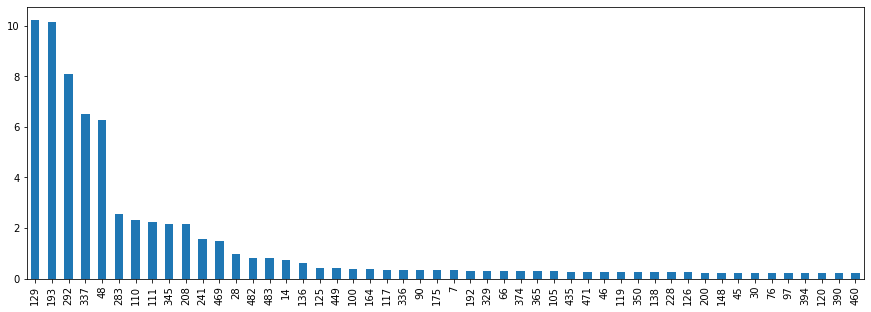

In [288]:
ax = features[0].sort_values(ascending=False).head(50).plot(kind = 'bar', figsize = (15, 5))

In [290]:
get_mean_RMSE(np.argsort(catboost.feature_importances_)[::-1][:10])

1.4748982573940428

In [292]:
print(*np.argsort(catboost.feature_importances_)[::-1][:10])

129 193 292 337 48 283 110 111 345 208


## Обобщённый AUC

In [5]:
import random
from bisect import bisect_left, bisect_right

In [20]:
def generate_input(n):
    input_array = []
    for i in range(n):
        input_array.append([str(random.randint(0, 100)), str(random.randint(0, 100))])
    with open ('input_f.txt', 'w') as file:
        file.write(str(n) + '\n')
        for i in input_array:
            file.write(' '.join(i) + '\n')

In [139]:
generate_input(10000)

In [434]:
data = []
for _ in range(int(input())):
    data.append(list(map(float, input().split())))

3
0.5 0
0.5 1
2 0.5


In [9]:
%%time
with open ('input_f.txt', 'r') as file:
    n = file.readline()
    t, y = zip(*sorted(tuple(map(float, line.split())) for line in file))
y_sorted = sorted(y)

Wall time: 20 ms


In [10]:
n = int(n)

In [11]:
%%time
i = n - 1
t_sum = 0
y_sum = 0
while i > 0:
    j = i
    while j >= 0 and  t[i] == t[j]:
        l = bisect_left(y_sorted, y[j])
        y_sorted.pop(l)
        j -= 1
    for k in range(j+1, i+1):
        l = bisect_left(y_sorted, y[k])
        r = bisect_right(y_sorted, y[k])
        y_sum += l + (r - l) / 2
        t_sum += j + 1
    i = j
print(y_sum/t_sum)

0.5037958346263455
Wall time: 25.9 ms


In [280]:
bisect_left(y_sorted, y[i])

9892

In [281]:
y[i]

100.0

In [282]:
y_sorted[-1]

99.0

In [1]:
n = int(input())
t, y = zip(*sorted(tuple(map(float, input().split())) for _ in range(n)))
y_sorted = sorted(y)
i = n - 1
t_sum = 0
y_sum = 0
while i >= 0:
    j = i
    while t[i] == t[j] and j >= 0:
        l = bisect_left(y_sorted, y[j])
        y_sorted.pop(l)
        j -= 1
    for k in range(j+1, i+1):
        l = bisect_left(y_sorted, y[k])
        r = bisect_right(y_sorted, y[k])
        y_sum += l + (r - l) / 2
        t_sum += j + 1
    i = j
print(y_sum/t_sum)

3
1 2
3 2
5 1


NameError: name 'bisect_left' is not defined

## Перестановки

In [3]:
from scipy.stats import mode
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [125]:
test = []
with open ('g.in', 'r') as file:
    n = file.readline()
    for line in file:
        test.append(list(map(int, line.split())))

In [10]:
def RandomPermutation():  
    perm = list(range(8))  
    random.shuffle(perm)  
    return perm  
 
def StupidPermutation():  
    partialSums = [0,1,8,35,111,285,  
        628,1230,2191,3606,5546,8039,11056,14506,18242,  
        22078,25814,29264,32281,34774,36714,38129,39090,  
        39692,40035,40209,40285,40312,40319,40320]  
    r = random.randint(0, partialSums[-1])  
    numInv = 0  
    while partialSums[numInv] < r:  
        numInv += 1  
    perm = list(range(8))  
    for step in range(numInv):  
        t1 = random.randint(0, 7)  
        t2 = random.randint(0, 7)  
        perm[t1], perm[t2] = perm[t2], perm[t1]  
    return perm

In [110]:
train = []
n_train = 2000
for i in range(n_train):
    p = random.random()
    if p > 0.5:
        for j in range(1000):
            cur_array = RandomPermutation()
            cur_array.append(1)
            train.append(cur_array)
    else:
        for j in range(1000):
            cur_array = StupidPermutation()
            cur_array.append(0)
            train.append(cur_array)
train = np.array(train)

In [111]:
train_mode = []
for i in range(n_train):
    train_mode.append(mode(train[1000 * i: 1000 * (i+1)], axis = 0)[0][0])

In [112]:
train = pd.DataFrame(train_mode, columns = list(range(8)) + ['target'])

In [117]:
train, val = train_test_split(train, test_size = 0.3)

In [119]:
catboost = CatBoostClassifier()

In [120]:
catboost.fit(train[range(8)], train['target'])

Learning rate set to 0.011894
0:	learn: 0.6745865	total: 156ms	remaining: 2m 35s
1:	learn: 0.6538876	total: 163ms	remaining: 1m 21s
2:	learn: 0.6373550	total: 164ms	remaining: 54.5s
3:	learn: 0.6178378	total: 166ms	remaining: 41.2s
4:	learn: 0.5986286	total: 167ms	remaining: 33.3s
5:	learn: 0.5824817	total: 169ms	remaining: 28s
6:	learn: 0.5647271	total: 171ms	remaining: 24.2s
7:	learn: 0.5505300	total: 172ms	remaining: 21.3s
8:	learn: 0.5358568	total: 173ms	remaining: 19.1s
9:	learn: 0.5228070	total: 174ms	remaining: 17.3s
10:	learn: 0.5075574	total: 176ms	remaining: 15.8s
11:	learn: 0.4934977	total: 177ms	remaining: 14.6s
12:	learn: 0.4803459	total: 178ms	remaining: 13.5s
13:	learn: 0.4671084	total: 180ms	remaining: 12.7s
14:	learn: 0.4536779	total: 181ms	remaining: 11.9s
15:	learn: 0.4417571	total: 182ms	remaining: 11.2s
16:	learn: 0.4308362	total: 184ms	remaining: 10.6s
17:	learn: 0.4200901	total: 185ms	remaining: 10.1s
18:	learn: 0.4080349	total: 186ms	remaining: 9.62s
19:	learn: 

246:	learn: 0.0541903	total: 500ms	remaining: 1.52s
247:	learn: 0.0539020	total: 502ms	remaining: 1.52s
248:	learn: 0.0537564	total: 503ms	remaining: 1.52s
249:	learn: 0.0536110	total: 505ms	remaining: 1.51s
250:	learn: 0.0534081	total: 506ms	remaining: 1.51s
251:	learn: 0.0532450	total: 507ms	remaining: 1.5s
252:	learn: 0.0530596	total: 508ms	remaining: 1.5s
253:	learn: 0.0528582	total: 510ms	remaining: 1.5s
254:	learn: 0.0526602	total: 511ms	remaining: 1.49s
255:	learn: 0.0525285	total: 512ms	remaining: 1.49s
256:	learn: 0.0523727	total: 514ms	remaining: 1.48s
257:	learn: 0.0521631	total: 515ms	remaining: 1.48s
258:	learn: 0.0520618	total: 516ms	remaining: 1.48s
259:	learn: 0.0518897	total: 518ms	remaining: 1.47s
260:	learn: 0.0516361	total: 519ms	remaining: 1.47s
261:	learn: 0.0514979	total: 521ms	remaining: 1.47s
262:	learn: 0.0514367	total: 522ms	remaining: 1.46s
263:	learn: 0.0512757	total: 524ms	remaining: 1.46s
264:	learn: 0.0510683	total: 525ms	remaining: 1.46s
265:	learn: 0.0

492:	learn: 0.0285594	total: 824ms	remaining: 847ms
493:	learn: 0.0284665	total: 825ms	remaining: 845ms
494:	learn: 0.0284095	total: 827ms	remaining: 843ms
495:	learn: 0.0283339	total: 828ms	remaining: 841ms
496:	learn: 0.0282732	total: 829ms	remaining: 839ms
497:	learn: 0.0282128	total: 830ms	remaining: 837ms
498:	learn: 0.0281515	total: 832ms	remaining: 835ms
499:	learn: 0.0280664	total: 833ms	remaining: 833ms
500:	learn: 0.0280060	total: 834ms	remaining: 831ms
501:	learn: 0.0279439	total: 836ms	remaining: 829ms
502:	learn: 0.0278842	total: 837ms	remaining: 827ms
503:	learn: 0.0278261	total: 838ms	remaining: 825ms
504:	learn: 0.0277560	total: 839ms	remaining: 823ms
505:	learn: 0.0276852	total: 841ms	remaining: 821ms
506:	learn: 0.0276160	total: 842ms	remaining: 819ms
507:	learn: 0.0275522	total: 844ms	remaining: 817ms
508:	learn: 0.0275006	total: 845ms	remaining: 815ms
509:	learn: 0.0274452	total: 846ms	remaining: 813ms
510:	learn: 0.0273703	total: 848ms	remaining: 811ms
511:	learn: 

763:	learn: 0.0163476	total: 1.16s	remaining: 358ms
764:	learn: 0.0163209	total: 1.16s	remaining: 357ms
765:	learn: 0.0162967	total: 1.16s	remaining: 355ms
766:	learn: 0.0162705	total: 1.16s	remaining: 354ms
767:	learn: 0.0162398	total: 1.17s	remaining: 352ms
768:	learn: 0.0162095	total: 1.17s	remaining: 351ms
769:	learn: 0.0161867	total: 1.17s	remaining: 349ms
770:	learn: 0.0161569	total: 1.17s	remaining: 347ms
771:	learn: 0.0161242	total: 1.17s	remaining: 346ms
772:	learn: 0.0160989	total: 1.17s	remaining: 344ms
773:	learn: 0.0160682	total: 1.17s	remaining: 343ms
774:	learn: 0.0160434	total: 1.17s	remaining: 341ms
775:	learn: 0.0160001	total: 1.18s	remaining: 339ms
776:	learn: 0.0159541	total: 1.18s	remaining: 338ms
777:	learn: 0.0159195	total: 1.18s	remaining: 336ms
778:	learn: 0.0158979	total: 1.18s	remaining: 335ms
779:	learn: 0.0158539	total: 1.18s	remaining: 333ms
780:	learn: 0.0158300	total: 1.18s	remaining: 332ms
781:	learn: 0.0157900	total: 1.18s	remaining: 330ms
782:	learn: 

In [124]:
accuracy_score(val['target'], catboost.predict(val[range(8)]))

0.9833333333333333

In [130]:
test_mode = []
for i in range(int(n)):
    test_mode.append(mode(test[1000 * i: 1000 * (i+1)], axis = 0)[0][0])
test = pd.DataFrame(test_mode, columns = range(8))

In [140]:
predicts = catboost.predict_proba(test)

In [155]:
sorted_predicts = np.argsort(predicts[:,0])

In [156]:
with open ('answer_g.txt', 'w') as file:
    for i in sorted_predicts:
        file.write(str(i))
        file.write('\n')

In [147]:
with open ('answer_g.txt', 'r') as file:
    ans = file.read()

In [153]:
catboost.predict_proba(test.loc[72].values)

array([9.99977134e-01, 2.28658436e-05])

In [154]:
catboost.predict(test.loc[72].values)

0

## Разминка

In [165]:
from sklearn.linear_model import LogisticRegression

In [191]:
train = pd.read_csv('i_train.tsv', sep = '\t', names = list(range(100)) + ['target'])
test = pd.read_csv('i_test.tsv', sep = '\t', names = range(100))

In [192]:
train, valid = train_test_split(train, test_size = 0.1)

In [250]:
logit = CatBoostClassifier()

In [251]:
logit.fit(train[range(100)], train['target'])

Learning rate set to 0.026327
0:	learn: 0.6929327	total: 26.7ms	remaining: 26.7s
1:	learn: 0.6926829	total: 37.4ms	remaining: 18.7s
2:	learn: 0.6924235	total: 45.2ms	remaining: 15s
3:	learn: 0.6921936	total: 51.6ms	remaining: 12.9s
4:	learn: 0.6919482	total: 70.1ms	remaining: 13.9s
5:	learn: 0.6916545	total: 85.6ms	remaining: 14.2s
6:	learn: 0.6914531	total: 91.7ms	remaining: 13s
7:	learn: 0.6912535	total: 101ms	remaining: 12.5s
8:	learn: 0.6910417	total: 107ms	remaining: 11.8s
9:	learn: 0.6907307	total: 116ms	remaining: 11.5s
10:	learn: 0.6904588	total: 126ms	remaining: 11.4s
11:	learn: 0.6901857	total: 140ms	remaining: 11.5s
12:	learn: 0.6898705	total: 149ms	remaining: 11.3s
13:	learn: 0.6895245	total: 157ms	remaining: 11.1s
14:	learn: 0.6891993	total: 166ms	remaining: 10.9s
15:	learn: 0.6173400	total: 173ms	remaining: 10.7s
16:	learn: 0.6171171	total: 181ms	remaining: 10.5s
17:	learn: 0.6168876	total: 198ms	remaining: 10.8s
18:	learn: 0.6166495	total: 213ms	remaining: 11s
19:	learn:

163:	learn: 0.2699589	total: 1.69s	remaining: 8.62s
164:	learn: 0.2699589	total: 1.69s	remaining: 8.58s
165:	learn: 0.2698955	total: 1.7s	remaining: 8.56s
166:	learn: 0.2698170	total: 1.71s	remaining: 8.54s
167:	learn: 0.2697524	total: 1.72s	remaining: 8.52s
168:	learn: 0.2696813	total: 1.73s	remaining: 8.49s
169:	learn: 0.2696220	total: 1.73s	remaining: 8.47s
170:	learn: 0.2695489	total: 1.74s	remaining: 8.44s
171:	learn: 0.2694698	total: 1.75s	remaining: 8.42s
172:	learn: 0.2421838	total: 1.77s	remaining: 8.46s
173:	learn: 0.2421127	total: 1.78s	remaining: 8.43s
174:	learn: 0.2420484	total: 1.78s	remaining: 8.4s
175:	learn: 0.2419840	total: 1.8s	remaining: 8.44s
176:	learn: 0.2419095	total: 1.82s	remaining: 8.45s
177:	learn: 0.2418483	total: 1.83s	remaining: 8.46s
178:	learn: 0.2417823	total: 1.84s	remaining: 8.43s
179:	learn: 0.2417065	total: 1.85s	remaining: 8.42s
180:	learn: 0.2416395	total: 1.86s	remaining: 8.43s
181:	learn: 0.2415715	total: 1.88s	remaining: 8.44s
182:	learn: 0.2

331:	learn: 0.1148607	total: 3.46s	remaining: 6.95s
332:	learn: 0.1148291	total: 3.47s	remaining: 6.96s
333:	learn: 0.1147988	total: 3.49s	remaining: 6.96s
334:	learn: 0.1147768	total: 3.5s	remaining: 6.94s
335:	learn: 0.1147514	total: 3.5s	remaining: 6.92s
336:	learn: 0.1147188	total: 3.51s	remaining: 6.9s
337:	learn: 0.1146883	total: 3.52s	remaining: 6.89s
338:	learn: 0.1044210	total: 3.52s	remaining: 6.87s
339:	learn: 0.1043899	total: 3.54s	remaining: 6.87s
340:	learn: 0.1043618	total: 3.55s	remaining: 6.87s
341:	learn: 0.1043320	total: 3.57s	remaining: 6.87s
342:	learn: 0.1042988	total: 3.58s	remaining: 6.87s
343:	learn: 0.1042696	total: 3.6s	remaining: 6.87s
344:	learn: 0.1042427	total: 3.61s	remaining: 6.85s
345:	learn: 0.1042123	total: 3.62s	remaining: 6.83s
346:	learn: 0.1041766	total: 3.63s	remaining: 6.83s
347:	learn: 0.1041517	total: 3.65s	remaining: 6.83s
348:	learn: 0.1041292	total: 3.66s	remaining: 6.82s
349:	learn: 0.1041009	total: 3.66s	remaining: 6.8s
350:	learn: 0.104

490:	learn: 0.0324735	total: 5.21s	remaining: 5.4s
491:	learn: 0.0324652	total: 5.22s	remaining: 5.39s
492:	learn: 0.0324542	total: 5.23s	remaining: 5.38s
493:	learn: 0.0324443	total: 5.24s	remaining: 5.37s
494:	learn: 0.0324337	total: 5.25s	remaining: 5.35s
495:	learn: 0.0324235	total: 5.26s	remaining: 5.34s
496:	learn: 0.0324131	total: 5.28s	remaining: 5.34s
497:	learn: 0.0324039	total: 5.29s	remaining: 5.33s
498:	learn: 0.0323955	total: 5.31s	remaining: 5.33s
499:	learn: 0.0302620	total: 5.32s	remaining: 5.32s
500:	learn: 0.0302543	total: 5.33s	remaining: 5.31s
501:	learn: 0.0302442	total: 5.34s	remaining: 5.3s
502:	learn: 0.0302356	total: 5.35s	remaining: 5.29s
503:	learn: 0.0302252	total: 5.36s	remaining: 5.28s
504:	learn: 0.0302165	total: 5.37s	remaining: 5.26s
505:	learn: 0.0302075	total: 5.38s	remaining: 5.26s
506:	learn: 0.0301976	total: 5.4s	remaining: 5.25s
507:	learn: 0.0301878	total: 5.41s	remaining: 5.24s
508:	learn: 0.0301800	total: 5.42s	remaining: 5.23s
509:	learn: 0.0

657:	learn: 0.0135546	total: 6.94s	remaining: 3.61s
658:	learn: 0.0135508	total: 6.95s	remaining: 3.6s
659:	learn: 0.0128939	total: 6.96s	remaining: 3.58s
660:	learn: 0.0128902	total: 6.97s	remaining: 3.57s
661:	learn: 0.0128871	total: 6.97s	remaining: 3.56s
662:	learn: 0.0128833	total: 6.98s	remaining: 3.55s
663:	learn: 0.0128798	total: 6.99s	remaining: 3.54s
664:	learn: 0.0128760	total: 7.01s	remaining: 3.53s
665:	learn: 0.0128717	total: 7.02s	remaining: 3.52s
666:	learn: 0.0128687	total: 7.04s	remaining: 3.51s
667:	learn: 0.0128648	total: 7.05s	remaining: 3.5s
668:	learn: 0.0128611	total: 7.06s	remaining: 3.49s
669:	learn: 0.0128570	total: 7.07s	remaining: 3.48s
670:	learn: 0.0128528	total: 7.08s	remaining: 3.47s
671:	learn: 0.0128488	total: 7.1s	remaining: 3.46s
672:	learn: 0.0128444	total: 7.11s	remaining: 3.45s
673:	learn: 0.0128405	total: 7.11s	remaining: 3.44s
674:	learn: 0.0128361	total: 7.13s	remaining: 3.43s
675:	learn: 0.0128327	total: 7.14s	remaining: 3.42s
676:	learn: 0.0

823:	learn: 0.0079532	total: 8.51s	remaining: 1.82s
824:	learn: 0.0079532	total: 8.51s	remaining: 1.8s
825:	learn: 0.0079532	total: 8.52s	remaining: 1.79s
826:	learn: 0.0079509	total: 8.53s	remaining: 1.78s
827:	learn: 0.0079485	total: 8.54s	remaining: 1.77s
828:	learn: 0.0079460	total: 8.55s	remaining: 1.76s
829:	learn: 0.0079436	total: 8.55s	remaining: 1.75s
830:	learn: 0.0076396	total: 8.56s	remaining: 1.74s
831:	learn: 0.0076374	total: 8.57s	remaining: 1.73s
832:	learn: 0.0076374	total: 8.58s	remaining: 1.72s
833:	learn: 0.0073503	total: 8.58s	remaining: 1.71s
834:	learn: 0.0070796	total: 8.59s	remaining: 1.7s
835:	learn: 0.0070774	total: 8.6s	remaining: 1.69s
836:	learn: 0.0070774	total: 8.61s	remaining: 1.68s
837:	learn: 0.0070774	total: 8.61s	remaining: 1.67s
838:	learn: 0.0070774	total: 8.62s	remaining: 1.65s
839:	learn: 0.0070774	total: 8.63s	remaining: 1.64s
840:	learn: 0.0068214	total: 8.63s	remaining: 1.63s
841:	learn: 0.0068214	total: 8.64s	remaining: 1.62s
842:	learn: 0.0

992:	learn: 0.0048858	total: 9.99s	remaining: 70.4ms
993:	learn: 0.0048858	total: 9.99s	remaining: 60.3ms
994:	learn: 0.0048858	total: 10s	remaining: 50.3ms
995:	learn: 0.0048858	total: 10s	remaining: 40.2ms
996:	learn: 0.0048858	total: 10s	remaining: 30.1ms
997:	learn: 0.0047403	total: 10s	remaining: 20.1ms
998:	learn: 0.0047403	total: 10s	remaining: 10ms
999:	learn: 0.0047403	total: 10s	remaining: 0us


In [252]:
accuracy_score(valid['target'], logit.predict(valid[range(100)]))

1.0

In [253]:
predicts = logit.predict(test)

In [254]:
for i in predicts:
    print(i)

1
0
0
1
0
1
1
1
0
1
1
0
0
0
1
1
1
1
0
1
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
1
1
1
1
1
1
0
1
1
0
0
0
1
0
0
1
1
0
0
0
1
0
1
0
0
1
0
0
1
0
0
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
0
0
1
0
0
0
1
0
1
1
1
1
0
0
0
0
0
1
1
1
1
1
0
0
1
0
0
0
0
1
1
0
0
1
1
0
1
0
0
1
1
0
0
1
0
0
0
1
1
0
1
0
0
1
1
1
1
1
1
1
0
1
0
1
0
0
1
0
1
1
1
1
1
1
1
0
1
0
0
0
0
0
1
0
0
0
1
0
1
0
1
1
0
0
1
0
1
1
0
0
1
1
1
0
0
0
0
1
1
0
0
0
0
1
1
0
0
1
1
0
1
0
1
1
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
1
0
0
1
0
0
1
1
1
1
1
1
0
1
0
1
1
0
0
0
0
0
0
1
0
1
1
0
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
0
0
0
0
1
1
1
0
0
0
0
0
1
1
0
1
0
1
1
0
0
1
1
1
0
0
1
0
1
0
1
1
0
0
1
1
0
1
0
1
0
1
1
1
0
0
1
1
1
0
1
1
1
0
0
1
0
0
0
0
0
0
1
1
1
1
1
0
0
1
0
1
0
0
0
1
1
1
0
1
0
0
1
1
1
0
0
1
0
1
1
0
1
1
0
1
1
0
1
1
0
0
0
0
0
0
0
1
1
0
1
0
1
1
0
0
0
1
0
1
0
1
1
0
1
0
1
1
1
0
1
1
1
1
1
1
1
0
0
1
0
0
0
1
1
0
1
0
0
0
1
0
1
0
0
1
1
0
1
1
0
1
1
1
0
0
0
1
0
1
0
1
0
1
0
1
1
1
0
0
1
1
1
1
0
1
1
1
0
0
1
0
1
0
1
1
1
1
0
1
0
0
1
0
0
1
1
0
0
1
0
1
0
0
0
0
1
1
1
0
1
0
0
1
1
1
0


## Линейно разделимая выборка

In [421]:
n, m = map(int, input().split())
data = []
for _ in range(n):
    data.append(list(map(float, input().split())))

3 5
1 1 1 1 1 1
1 1 1 1 1 1
1 1 1 1 1 1


In [422]:
data = np.array(data)
w = np.mean(data[:,:-1], axis = 0)

In [423]:
k = 0
while k != 1:
    k = 1
    multiplication = np.dot(data[:,:-1], w)
    for idx, x in enumerate(data):
        if np.dot(x[:-1], w) * x[-1] <= 0:
            w += x[:-1] * x[-1]
            k = 0

In [424]:
w

array([1., 1., 1., 1., 1.])

In [386]:
w = list(map(int, w))
w = list(map(str, w))

In [387]:
w

['1', '1', '1', '1', '1']

## WiFi

In [241]:
import torch
import torch.nn as nn
from unidecode import unidecode
import re
from sklearn.model_selection import GroupShuffleSplit
from catboost import CatBoostClassifier

In [242]:
test = pd.read_csv('l_test.tsv', sep = '\t', index_col = 0)
train = pd.read_csv('l_train.tsv', sep = '\t', index_col = 0)

In [243]:
df = pd.concat((train, test))
df['test'] = df.target.isnull()

In [244]:
df['lat_distance'] = abs(df['lat'] - df['user_lat'])

In [245]:
df['lon_distance'] = abs(df['lon'] - df['user_lon'])

In [246]:
df['same_words'] = df.apply(lambda x: same_words(unidecode(x.names), unidecode(x.ssid)), axis = 1)

In [247]:
for n in range(4,8):
    df[f'n_gram_names_{n}'] = df.apply(lambda x: n_grams(unidecode(x.names), unidecode(x.ssid), n), axis = 1)

In [248]:
for n in range(4,8):
    df[f'n_gram_urls_{n}'] = df.apply(lambda x: n_grams(unidecode(x.urls), unidecode(x.ssid), n), axis = 1)

In [249]:
df = pd.concat([df, pd.get_dummies(df.publishing_status, prefix = 'publish')], axis = 1)

In [250]:
df.has_wifi.fillna(False, inplace = True)

In [251]:
def same_words(names, ssids):
    count = 0
    names = list(set(re.findall(r'\w+', names.lower())))
    ssids = list(set(re.findall(r'\w+', ssids.lower())))
    for name in names:
        for ssid in ssids:
            if name == ssid:
                count +=1
    return count / (1 + len(names) * len(ssids))

In [252]:
def n_grams (names, ssid, n):
    count = 0
    names = list(set(re.findall(r'\w+', names.lower())))
    for name in names:
        for i in range(len(ssid) - n):
            if ssid[i: i+ n] in name:
                count +=1
    return count / (1 + len(names) * len(ssid))

In [253]:
def n_grams_urls(urls, ssid, n):
    count = 0
    urls = re.findall(r'http://\w+', urls)
    for url in urls:
        for i in range(len(ssid) - n):
            if ssid[i:i+n] in url[7:]:
                count +=1
    return count / (1 + len(urls) * len(ssid))

In [369]:
def make_predict(df):
    group_nums = np.unique(df.group_num)
    for group_num in group_nums:
        idx_max = np.argmax(df[df.group_num == group_num]['predicts'])
        df['predicts'][df.group_num == group_num] = 0
        df['predicts'].loc[idx_max] = 1
    return df

In [365]:
def score(df):
    true_labels = 0
    group_nums = np.unique(df.group_num)
    df = make_predict(df)
    for group_num in group_nums:
        if (df[df.group_num == group_num]['predicts'] == df[df.group_num == group_num]['target']).all():
            true_labels += 1
    return true_labels / len(group_nums)

In [255]:
test = df[df.test]

In [256]:
df = df[~df.test]

In [260]:
train, val = next(GroupShuffleSplit(2).split(df, groups = df.group_num))

In [261]:
catboost = CatBoostClassifier()

In [262]:
train_columns = ['has_wifi', 'lat_distance', 'lon_distance'] + list(filter(lambda x: x[:6] == 'n_gram', df.columns)) + \
    list(filter(lambda x: x[:8] == 'publish_', df.columns))

In [263]:
train_columns

['has_wifi',
 'lat_distance',
 'lon_distance',
 'n_gram_names_4',
 'n_gram_names_5',
 'n_gram_names_6',
 'n_gram_names_7',
 'n_gram_urls_4',
 'n_gram_urls_5',
 'n_gram_urls_6',
 'n_gram_urls_7',
 'publish_closed',
 'publish_denied_publishing',
 'publish_not_answered',
 'publish_obsolete',
 'publish_publish',
 'publish_temporarily_closed',
 'publish_unchecked',
 'publish_unknown']

In [264]:
catboost.fit(df[train_columns].loc[train], df['target'].loc[train])

Learning rate set to 0.065425
0:	learn: 0.5516149	total: 23.8ms	remaining: 23.8s
1:	learn: 0.4412178	total: 48.6ms	remaining: 24.3s
2:	learn: 0.3742580	total: 66.4ms	remaining: 22.1s
3:	learn: 0.3102912	total: 94.9ms	remaining: 23.6s
4:	learn: 0.2633838	total: 116ms	remaining: 23.1s
5:	learn: 0.2284045	total: 137ms	remaining: 22.7s
6:	learn: 0.2015771	total: 153ms	remaining: 21.7s
7:	learn: 0.1815238	total: 172ms	remaining: 21.3s
8:	learn: 0.1660457	total: 190ms	remaining: 20.9s
9:	learn: 0.1540407	total: 207ms	remaining: 20.5s
10:	learn: 0.1444696	total: 223ms	remaining: 20.1s
11:	learn: 0.1368166	total: 243ms	remaining: 20s
12:	learn: 0.1307484	total: 260ms	remaining: 19.7s
13:	learn: 0.1257267	total: 276ms	remaining: 19.4s
14:	learn: 0.1216198	total: 297ms	remaining: 19.5s
15:	learn: 0.1180763	total: 315ms	remaining: 19.4s
16:	learn: 0.1153205	total: 331ms	remaining: 19.2s
17:	learn: 0.1129527	total: 354ms	remaining: 19.3s
18:	learn: 0.1109998	total: 370ms	remaining: 19.1s
19:	learn

161:	learn: 0.0927543	total: 2.89s	remaining: 15s
162:	learn: 0.0927305	total: 2.91s	remaining: 15s
163:	learn: 0.0926993	total: 2.93s	remaining: 14.9s
164:	learn: 0.0926742	total: 2.94s	remaining: 14.9s
165:	learn: 0.0926578	total: 2.96s	remaining: 14.9s
166:	learn: 0.0926121	total: 2.98s	remaining: 14.9s
167:	learn: 0.0925987	total: 3s	remaining: 14.9s
168:	learn: 0.0925654	total: 3.02s	remaining: 14.8s
169:	learn: 0.0925460	total: 3.04s	remaining: 14.8s
170:	learn: 0.0925120	total: 3.06s	remaining: 14.8s
171:	learn: 0.0925038	total: 3.08s	remaining: 14.8s
172:	learn: 0.0924869	total: 3.09s	remaining: 14.8s
173:	learn: 0.0924516	total: 3.11s	remaining: 14.8s
174:	learn: 0.0924282	total: 3.13s	remaining: 14.8s
175:	learn: 0.0924090	total: 3.15s	remaining: 14.7s
176:	learn: 0.0923747	total: 3.17s	remaining: 14.7s
177:	learn: 0.0923449	total: 3.18s	remaining: 14.7s
178:	learn: 0.0923211	total: 3.2s	remaining: 14.7s
179:	learn: 0.0923103	total: 3.22s	remaining: 14.7s
180:	learn: 0.092295

320:	learn: 0.0892605	total: 5.71s	remaining: 12.1s
321:	learn: 0.0892461	total: 5.72s	remaining: 12.1s
322:	learn: 0.0892066	total: 5.74s	remaining: 12s
323:	learn: 0.0891890	total: 5.76s	remaining: 12s
324:	learn: 0.0891519	total: 5.77s	remaining: 12s
325:	learn: 0.0891266	total: 5.79s	remaining: 12s
326:	learn: 0.0891050	total: 5.8s	remaining: 11.9s
327:	learn: 0.0890668	total: 5.82s	remaining: 11.9s
328:	learn: 0.0890459	total: 5.83s	remaining: 11.9s
329:	learn: 0.0890282	total: 5.86s	remaining: 11.9s
330:	learn: 0.0890117	total: 5.87s	remaining: 11.9s
331:	learn: 0.0890004	total: 5.89s	remaining: 11.9s
332:	learn: 0.0889848	total: 5.91s	remaining: 11.8s
333:	learn: 0.0889675	total: 5.93s	remaining: 11.8s
334:	learn: 0.0889600	total: 5.95s	remaining: 11.8s
335:	learn: 0.0889544	total: 5.97s	remaining: 11.8s
336:	learn: 0.0889403	total: 5.98s	remaining: 11.8s
337:	learn: 0.0889297	total: 6s	remaining: 11.8s
338:	learn: 0.0889177	total: 6.02s	remaining: 11.7s
339:	learn: 0.0888853	to

479:	learn: 0.0865185	total: 8.53s	remaining: 9.24s
480:	learn: 0.0865096	total: 8.55s	remaining: 9.22s
481:	learn: 0.0864878	total: 8.57s	remaining: 9.21s
482:	learn: 0.0864749	total: 8.58s	remaining: 9.19s
483:	learn: 0.0864635	total: 8.6s	remaining: 9.17s
484:	learn: 0.0864384	total: 8.62s	remaining: 9.15s
485:	learn: 0.0864185	total: 8.64s	remaining: 9.14s
486:	learn: 0.0864121	total: 8.66s	remaining: 9.12s
487:	learn: 0.0863996	total: 8.68s	remaining: 9.11s
488:	learn: 0.0863892	total: 8.7s	remaining: 9.09s
489:	learn: 0.0863637	total: 8.71s	remaining: 9.07s
490:	learn: 0.0863395	total: 8.74s	remaining: 9.06s
491:	learn: 0.0863257	total: 8.77s	remaining: 9.05s
492:	learn: 0.0862958	total: 8.79s	remaining: 9.04s
493:	learn: 0.0862800	total: 8.8s	remaining: 9.02s
494:	learn: 0.0862615	total: 8.82s	remaining: 9s
495:	learn: 0.0862477	total: 8.84s	remaining: 8.98s
496:	learn: 0.0862302	total: 8.86s	remaining: 8.97s
497:	learn: 0.0862181	total: 8.88s	remaining: 8.95s
498:	learn: 0.0862

638:	learn: 0.0842425	total: 11.4s	remaining: 6.46s
639:	learn: 0.0842353	total: 11.5s	remaining: 6.44s
640:	learn: 0.0842231	total: 11.5s	remaining: 6.42s
641:	learn: 0.0842128	total: 11.5s	remaining: 6.41s
642:	learn: 0.0842047	total: 11.5s	remaining: 6.39s
643:	learn: 0.0842037	total: 11.5s	remaining: 6.37s
644:	learn: 0.0841738	total: 11.5s	remaining: 6.35s
645:	learn: 0.0841535	total: 11.6s	remaining: 6.33s
646:	learn: 0.0841427	total: 11.6s	remaining: 6.31s
647:	learn: 0.0841197	total: 11.6s	remaining: 6.29s
648:	learn: 0.0840960	total: 11.6s	remaining: 6.28s
649:	learn: 0.0840745	total: 11.6s	remaining: 6.26s
650:	learn: 0.0840630	total: 11.7s	remaining: 6.25s
651:	learn: 0.0840587	total: 11.7s	remaining: 6.23s
652:	learn: 0.0840483	total: 11.7s	remaining: 6.22s
653:	learn: 0.0840301	total: 11.7s	remaining: 6.2s
654:	learn: 0.0840210	total: 11.7s	remaining: 6.18s
655:	learn: 0.0840184	total: 11.8s	remaining: 6.16s
656:	learn: 0.0840075	total: 11.8s	remaining: 6.14s
657:	learn: 0

797:	learn: 0.0823070	total: 14.3s	remaining: 3.62s
798:	learn: 0.0823004	total: 14.3s	remaining: 3.6s
799:	learn: 0.0822843	total: 14.3s	remaining: 3.58s
800:	learn: 0.0822652	total: 14.4s	remaining: 3.57s
801:	learn: 0.0822565	total: 14.4s	remaining: 3.55s
802:	learn: 0.0822483	total: 14.4s	remaining: 3.53s
803:	learn: 0.0822437	total: 14.4s	remaining: 3.51s
804:	learn: 0.0822410	total: 14.4s	remaining: 3.49s
805:	learn: 0.0822352	total: 14.4s	remaining: 3.48s
806:	learn: 0.0822203	total: 14.5s	remaining: 3.46s
807:	learn: 0.0822198	total: 14.5s	remaining: 3.44s
808:	learn: 0.0822059	total: 14.5s	remaining: 3.42s
809:	learn: 0.0821938	total: 14.5s	remaining: 3.4s
810:	learn: 0.0821896	total: 14.5s	remaining: 3.38s
811:	learn: 0.0821778	total: 14.6s	remaining: 3.37s
812:	learn: 0.0821772	total: 14.6s	remaining: 3.35s
813:	learn: 0.0821698	total: 14.6s	remaining: 3.33s
814:	learn: 0.0821580	total: 14.6s	remaining: 3.31s
815:	learn: 0.0821493	total: 14.6s	remaining: 3.3s
816:	learn: 0.0

956:	learn: 0.0805120	total: 17.3s	remaining: 777ms
957:	learn: 0.0805022	total: 17.3s	remaining: 759ms
958:	learn: 0.0804898	total: 17.3s	remaining: 741ms
959:	learn: 0.0804727	total: 17.4s	remaining: 723ms
960:	learn: 0.0804556	total: 17.4s	remaining: 705ms
961:	learn: 0.0804464	total: 17.4s	remaining: 687ms
962:	learn: 0.0804354	total: 17.4s	remaining: 669ms
963:	learn: 0.0804209	total: 17.4s	remaining: 651ms
964:	learn: 0.0804108	total: 17.4s	remaining: 633ms
965:	learn: 0.0803953	total: 17.5s	remaining: 615ms
966:	learn: 0.0803785	total: 17.5s	remaining: 597ms
967:	learn: 0.0803619	total: 17.5s	remaining: 579ms
968:	learn: 0.0803464	total: 17.5s	remaining: 561ms
969:	learn: 0.0803360	total: 17.5s	remaining: 542ms
970:	learn: 0.0803164	total: 17.6s	remaining: 524ms
971:	learn: 0.0803031	total: 17.6s	remaining: 506ms
972:	learn: 0.0802890	total: 17.6s	remaining: 488ms
973:	learn: 0.0802754	total: 17.6s	remaining: 470ms
974:	learn: 0.0802529	total: 17.6s	remaining: 452ms
975:	learn: 

In [304]:
df['predicts'].loc[val] =  catboost.predict_proba(df.loc[val][train_columns])[:,1]

In [366]:
score(df.loc[val])

0.7723809523809524

In [356]:
test['predicts'] = catboost.predict_proba(test[train_columns])[:,1]

In [370]:
make_predict(test)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13944    0.0
13945    0.0
13946    1.0
13947    0.0
13948    1.0
Name: predicts, Length: 13949, dtype: float64

In [378]:
with open ('target.tsv', 'w') as file:
    for i in range(len(test)):
        file.write(str(int(test.predicts.iloc[i])))
        file.write('\n')